In [103]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [104]:
link='http://bit.ly/w-data'
data=pd.read_csv(link)
print('Data Imported Successfully!')

Data Imported Successfully!


In [105]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [106]:
#Returning information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [107]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [108]:
print('In given dataset the no. of rows are {},and the no. of columns are {}'.format(data.shape[0],data.shape[1]))
data.shape

In given dataset the no. of rows are 25,and the no. of columns are 2


(25, 2)

In [109]:
data.drop_duplicates(inplace=True)

In [110]:
print('In given dataset the no. of rows are {},and the no. of columns are {}'.format(data.shape[0],data.shape[1]))
data.shape

In given dataset the no. of rows are 25,and the no. of columns are 2


(25, 2)

In [111]:
#so there are no duplicates in given data.

In [112]:
data.shape

(25, 2)

In [113]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [114]:
#checking missing values

<AxesSubplot:>

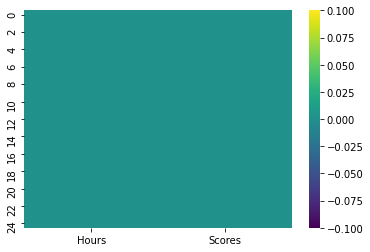

In [115]:
sns.heatmap(data.isnull(),cmap='viridis')

In [116]:
#so there are no missing values in the data

<AxesSubplot:>

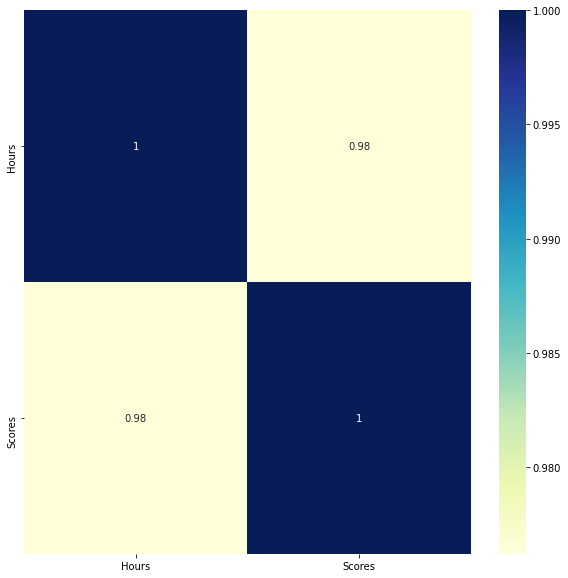

In [117]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),cmap="YlGnBu",annot=True)

# Data Visualization

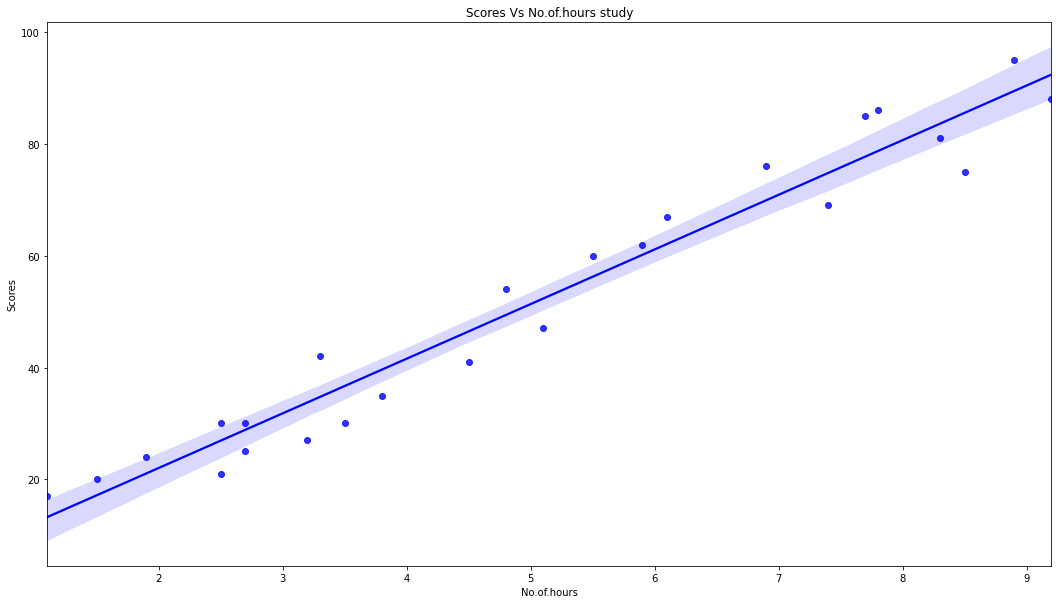

In [118]:
plt.figure(figsize=(18,10))
sns.regplot(x=data['Hours'],y=data['Scores'],color='blue')
plt.title('Scores Vs No.of.hours study')
plt.xlabel('No.of.hours')
plt.ylabel('Scores')
plt.show()

#From the above plot, we can say that both amounts of hours studied and secured scores are linearly inter-related.

# Training the Data

In [119]:
from sklearn.model_selection import train_test_split

In [120]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

In [121]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

In [122]:
from sklearn import linear_model

In [123]:
reg=linear_model.LinearRegression()
reg.fit(X,y)

LinearRegression()

In [124]:
#plotting for the training data

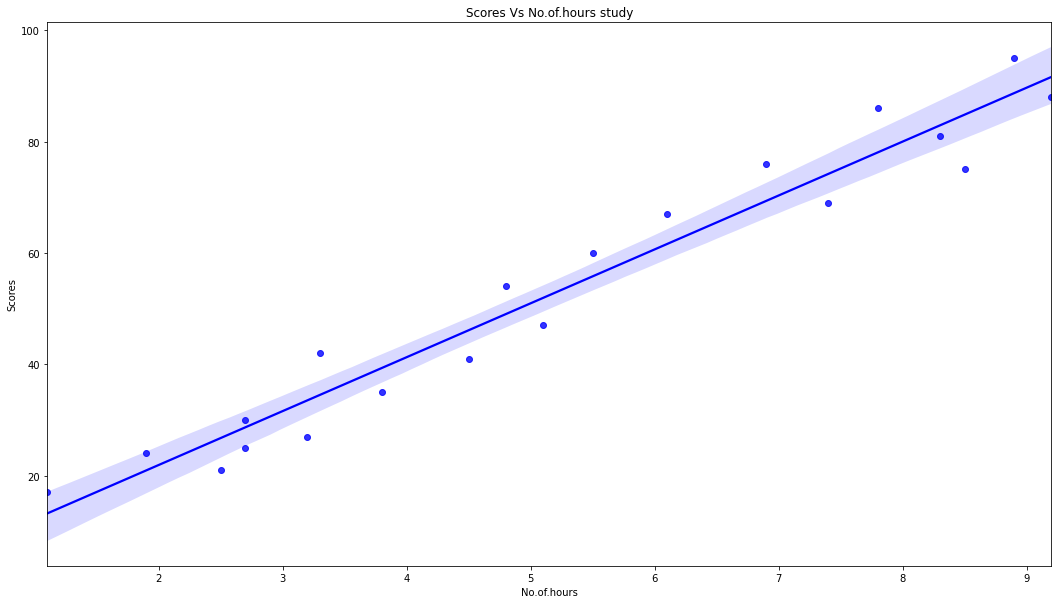

In [125]:
plt.figure(figsize=(18,10))
sns.regplot(x=X_train,y=y_train,color='blue')
plt.title('Scores Vs No.of.hours study')
plt.xlabel('No.of.hours')
plt.ylabel('Scores')
plt.show()

# Prediction

In [126]:
pred_y=reg.predict(X_test)
print('Predicted values are:')
pred_y

Predicted values are:


array([26.92318188, 77.75735951, 36.69898527, 17.14737849, 60.16091341])

In [127]:
print('Actual Values are:')
y_test

Actual Values are:


array([30, 85, 30, 20, 62], dtype=int64)

# Evaluating the model

In [128]:
from sklearn import metrics

In [129]:
# Calculating the accuracy of the model
print('Mean Absolute Error :',metrics.mean_absolute_error(y_test, pred_y))
print('Root Mean Square Error :',math.sqrt(metrics.mean_squared_error(y_test, pred_y)))

Mean Absolute Error : 4.3420303947554135
Root Mean Square Error : 4.864539928381483


In [130]:
#What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?

In [131]:
hours = 9.25
score_pred = reg.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(score_pred[0]))

No of Hours = 9.25
Predicted Score = 92.9098547701573
